In [14]:
import pandas as pd
from sklearn.cluster import KMeans

In [15]:
CITY = 'beijing'
# CITY = 'shanghai'

In [16]:
host_df = pd.read_csv('data/{}/host.csv'.format(CITY))

In [17]:
host_df

,host_id,host_name,host_since,host_has_profile_pic,host_identity_verified,host_response_rate,room_count,income,daily_income,ave_room_income,is_single,is_best
0,533062,Warner Beijing,2011-04-25,t,t,0.86,2,87547.71,24.379758,12.189879,t,f
1,3488642,Chunyu,2012-09-06,t,t,0.00,8,154258.19,49.905594,6.238199,f,f
2,6993205,Xing,2013-06-19,t,t,1.00,1,36972.86,13.181055,13.181055,t,f
3,4237084,Washa,2012-11-25,t,t,1.00,1,14601.08,4.849246,4.849246,t,f
4,5557443,Jade,2013-03-21,t,t,1.00,6,134622.48,46.501720,7.750287,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...
4719,214501039,徐,2018-09-09,t,t,1.00,1,13921.96,15.520580,15.520580,t,f
4720,387705126,Rebecca,2021-02-07,t,t,0.93,3,37221.00,2481.400000,827.133333,t,f
4721,274167295,雪儿,2019-07-07,t,t,1.00,1,1841.46,3.089698,3.089698,t,f
4722,262544317,知足常乐,2019-05-18,t,t,1.00,1,2089.60,3.234675,3.234675,t,f


In [18]:
drop_attr_list = ['host_id','host_name','host_since']
trans_attr_list =['host_has_profile_pic','host_identity_verified','is_single','is_best']

In [19]:
host_df = host_df.drop(drop_attr_list,axis=1)

In [20]:
for attr in trans_attr_list:
    host_df[attr] = host_df[attr].map(lambda x: 1 if x == 't' else 0)

In [21]:
host_df

,host_has_profile_pic,host_identity_verified,host_response_rate,room_count,income,daily_income,ave_room_income,is_single,is_best
0,1,1,0.86,2,87547.71,24.379758,12.189879,1,0
1,1,1,0.00,8,154258.19,49.905594,6.238199,0,0
2,1,1,1.00,1,36972.86,13.181055,13.181055,1,0
3,1,1,1.00,1,14601.08,4.849246,4.849246,1,0
4,1,1,1.00,6,134622.48,46.501720,7.750287,0,0
...,...,...,...,...,...,...,...,...,...
4719,1,1,1.00,1,13921.96,15.520580,15.520580,1,0
4720,1,1,0.93,3,37221.00,2481.400000,827.133333,1,0
4721,1,1,1.00,1,1841.46,3.089698,3.089698,1,0
4722,1,1,1.00,1,2089.60,3.234675,3.234675,1,0


In [22]:
kms = KMeans(n_clusters=10)
y = kms.fit_predict(host_df)

In [23]:
host_df['type'] = y

In [24]:
host_df['type'].value_counts()

0    3338
7     929
5     300
3     105
9      33
6      15
2       1
1       1
8       1
4       1
Name: type, dtype: int64

<AxesSubplot:xlabel='type'>

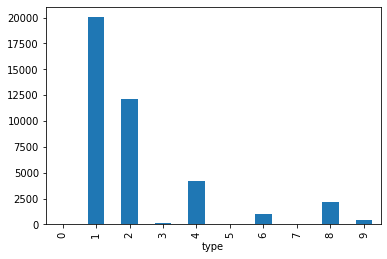

In [25]:
host_df.groupby('type')['daily_income'].min().plot.bar()